<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [50]:
!pip install pandas

In [51]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [52]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-21 06:49:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  15.4MB/s    in 13s     

2025-11-21 06:49:36 (11.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [54]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [19]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [55]:
df.info('ResponseId')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



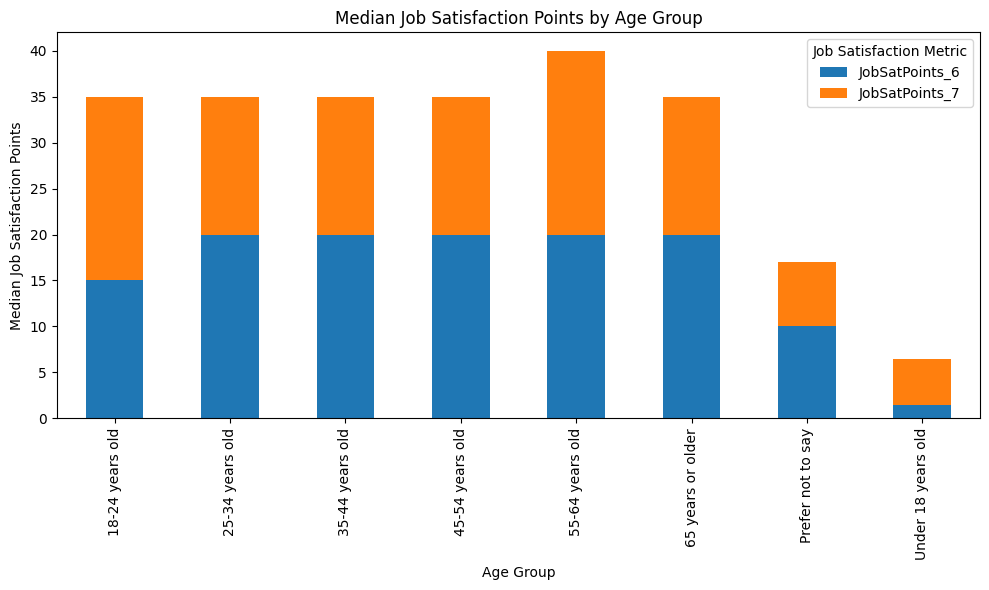

In [8]:
#calculate median
median_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

#create stacked chart
median_job_sat.plot.bar(stacked=True, figsize=(10, 6))
plt.title('Median Job Satisfaction Points by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=90) 
plt.legend(title='Job Satisfaction Metric')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [10]:
#Check unique value
print('\nThere are', df['Employment'].nunique(), 'unique Employment values in the survey:')
print(df['Employment'].value_counts())


There are 110 unique Employment values in the survey:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ... 

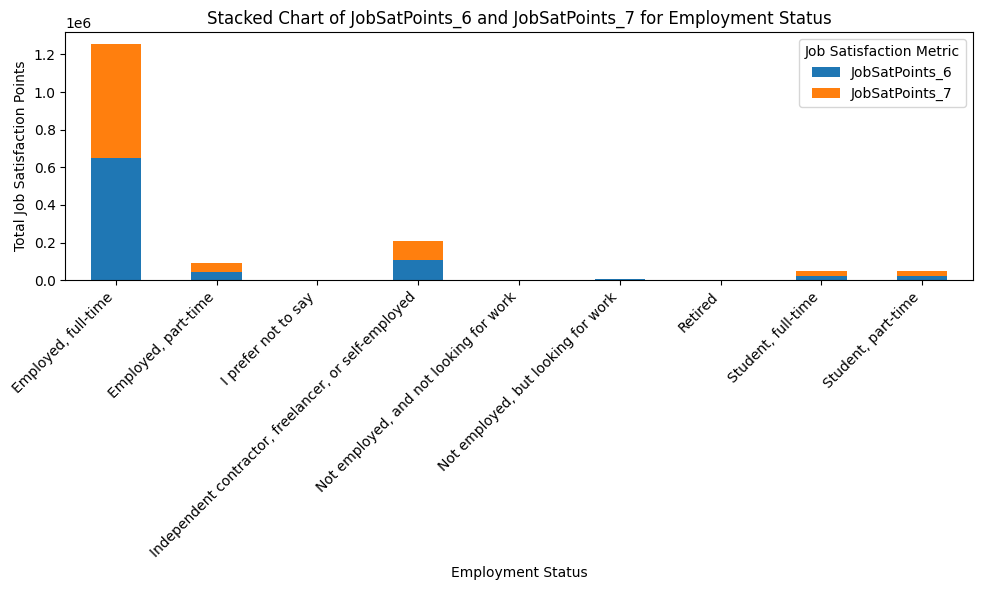

In [11]:
# 1. Handle semicolon-separated values: split and explode
# Split the 'Employment' column into lists
df['Employment_List'] = df['Employment'].str.split(';')

# Explode the lists into multiple rows, duplicating the JobSatPoints for each status
df_exploded = df.explode('Employment_List')

# Strip any leading/trailing whitespaces that might result from the split
df_exploded['Employment_List'] = df_exploded['Employment_List'].str.strip()

# 2. Group by the new 'Employment_List' column and sum the satisfaction points
# The aggregation method depends on what we want to visualize (mean, sum, median, etc.)
# Here, we will sum the points for each employment status as an example.
# If we want the average/median, use .mean() or .median()
grouped_data = df_exploded.groupby('Employment_List')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

# 3. Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Stacked Chart of JobSatPoints_6 and JobSatPoints_7 for Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Total Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Metric')

# Display the plot
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


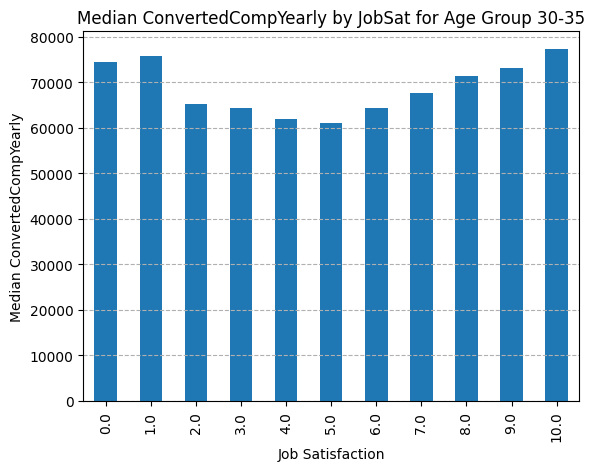

In [20]:
#map the 'Age' column to approximate numeric values
#if 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#filter the data for the age group 30-40
df_filtered = df.query('30 <= Age_Numeric <= 40').copy()

#drop rows with missing values in the relevant columns for cleaner plotting
df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSat'], inplace=True)

#group by 'JobSat' and calculate the median compensation
#the result will be a Series, which we convert to a DataFrame for easier handling
df_agg = df_filtered.groupby('JobSat')['ConvertedCompYearly'].median().to_frame().reset_index()

#example for a simple bar chart of median compensation by JobSat for the age group:
df_agg.plot(kind='bar', x='JobSat', y='ConvertedCompYearly', legend=False)
plt.title('Median ConvertedCompYearly by JobSat for Age Group 30-35')
plt.ylabel('Median ConvertedCompYearly')
plt.xlabel('Job Satisfaction')
plt.grid(axis='y', linestyle='--')
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [31]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 173.8 MB/s eta 0:00:0000:01


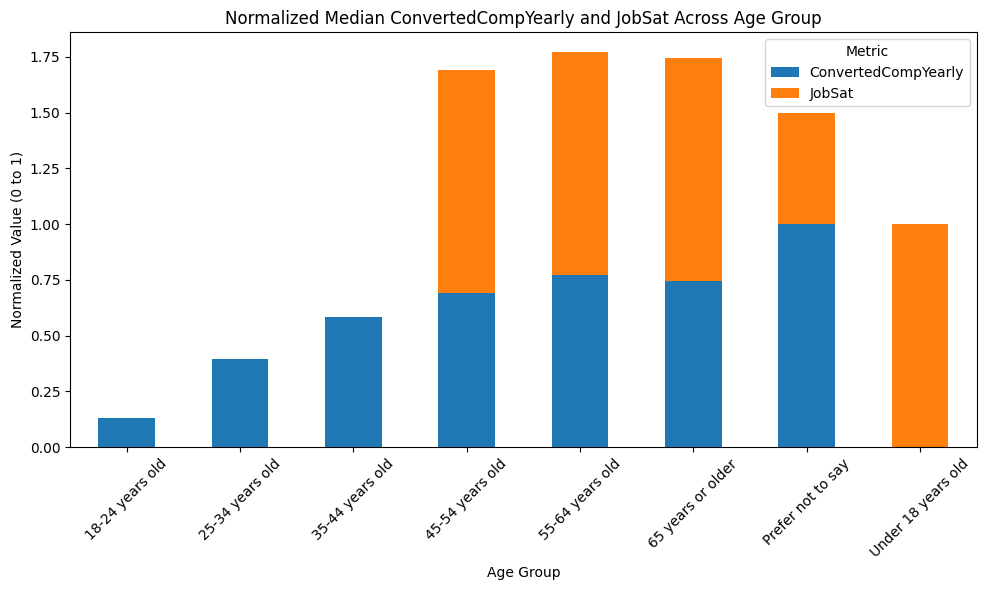

In [32]:
#Aggregate the data: group by AgeGroup and calculate the median for both metrics
#The result will be a DataFrame with 'AgeGroup' as the index.
median_data = df.groupby('Age')[['ConvertedCompYearly', 'JobSat']].median()

#Normalize the data using Min-Max scaling
#This rescales values to a range between [0, 1] for fair comparison on the same chart
scaler = MinMaxScaler()
median_data_normalized = pd.DataFrame(scaler.fit_transform(median_data), columns=median_data.columns, index=median_data.index)

#created stacked chart
median_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Normalized Median ConvertedCompYearly and JobSat Across Age Group')
plt.xlabel('Age Group')
plt.ylabel('Normalized Value (0 to 1)')
plt.xticks(rotation=45) # Rotate labels for better readability
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


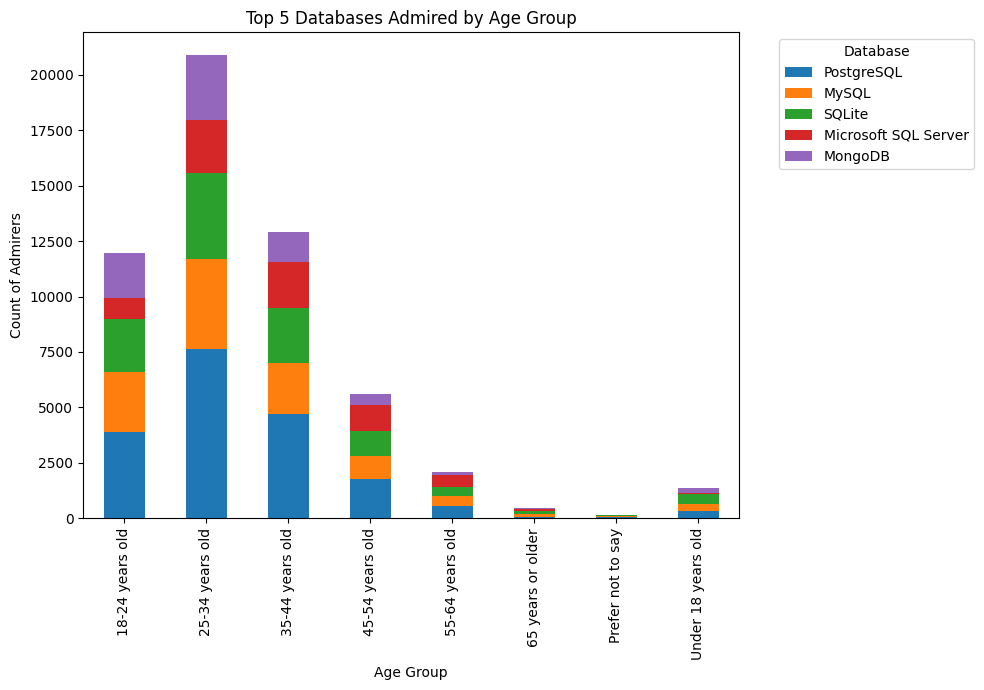

In [39]:
#Split the 'DatabaseAdmired' column into lists and explode to separate rows
df_exploded = df.assign(DatabaseAdmired=df['DatabaseAdmired'].str.split(';')).explode('DatabaseAdmired')

#Remove any leading/trailing whitespace that might remain
df_exploded['DatabaseAdmired'] = df_exploded['DatabaseAdmired'].str.strip()

#Filter for the top 5 databases overall
top_5_databases = df_exploded['DatabaseAdmired'].value_counts().head(5).index.tolist()
df_filtered = df_exploded[df_exploded['DatabaseAdmired'].isin(top_5_databases)]

#Create a frequency table using pd.crosstab
#This creates a pivot table with AgeGroup as index and top 5 databases as columns
freq_table = pd.crosstab(df_filtered['Age'], df_filtered['DatabaseAdmired'])

#Ensure all top 5 databases are columns in the table, even if some age groups don't have them
for db in top_5_databases:
    if db not in freq_table.columns:
        freq_table[db] = 0

#Reorder columns to match the general popularity order if desired (optional)
freq_table = freq_table[top_5_databases]

#Plot the stacked bar chart
ax = freq_table.plot(kind='bar', stacked=True, figsize=(10, 7))

#Customize the plot
ax.set_title('Top 5 Databases Admired by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Admirers')
ax.tick_params(axis='x', rotation=90) # Keep x-axis labels horizontal
ax.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot area
plt.tight_layout() # Adjust plot params to avoid text overlap
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


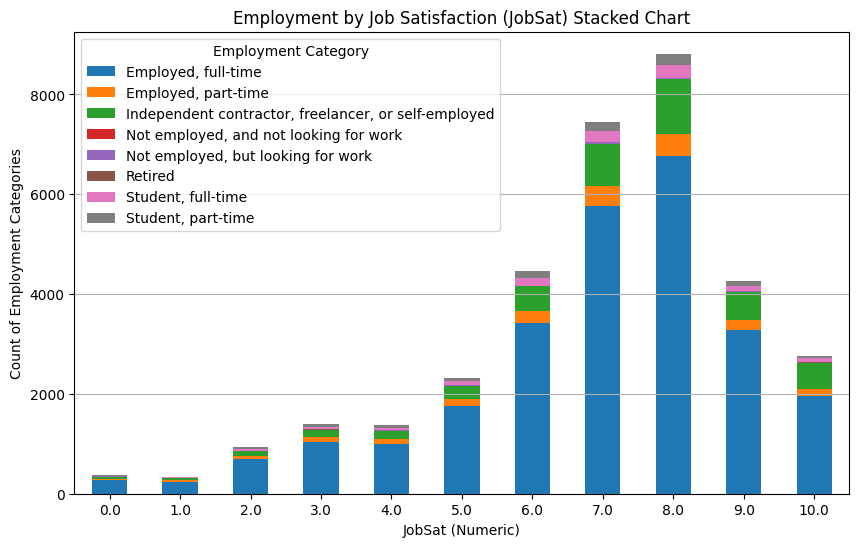

In [56]:
# Split the 'Employment' column by the semicolon delimiter and "explode" the DataFrame
df['Employment'] = df['Employment'].str.split(';')
df_exploded = df.explode('Employment')

# Strip whitespace that might exist around the split strings
df_exploded['Employment'] = df_exploded['Employment'].str.strip()

# Group by JobSat and Employment to count occurrences
grouped_data = df_exploded.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Create the stacked bar chart
ax = grouped_data.plot.bar(stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Employment by Job Satisfaction (JobSat) Stacked Chart')
plt.xlabel('JobSat (Numeric)')
plt.ylabel('Count of Employment Categories')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Employment Category')
plt.grid(axis='y') # Add a grid for better readability

# Display the plot
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


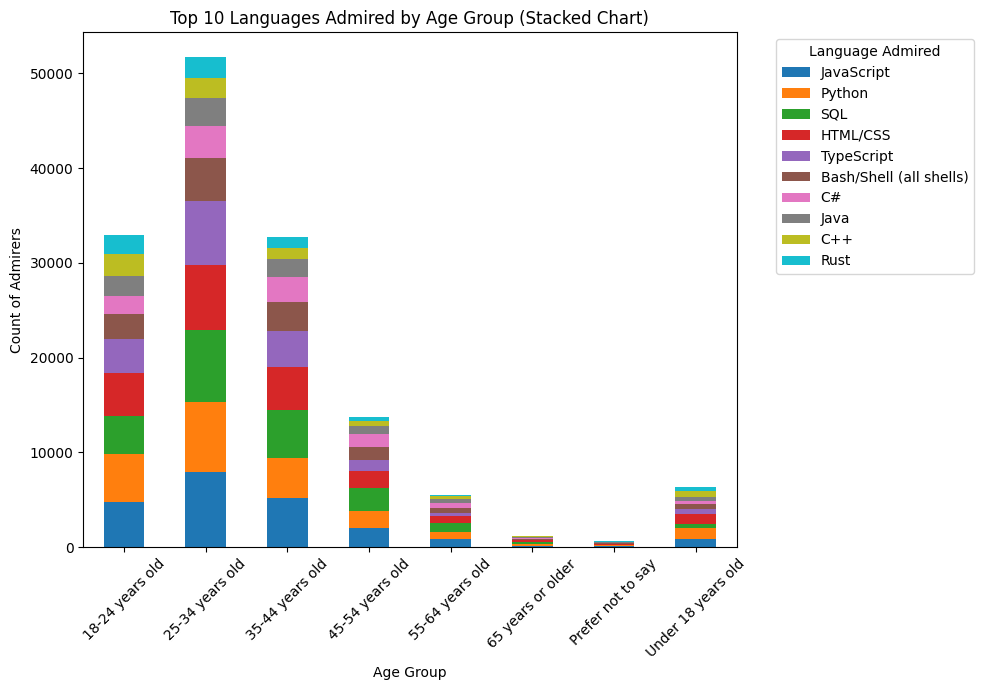

In [57]:
# 2. Process the 'LanguageAdmired' column
# Split the semicolon-separated strings into lists
df['LanguageAdmired'] = df['LanguageAdmired'].str.split(';')

# Explode the lists into separate rows
df_exploded = df.explode('LanguageAdmired')

# Remove potential leading/trailing whitespace from language names
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip()

# 3. Identify the Top 10 Languages
# Calculate the frequency of each language globally
top_10_languages = df_exploded['LanguageAdmired'].value_counts().head(10).index.tolist()

# Filter the exploded DataFrame to only include the top 10 languages
df_top_10 = df_exploded[df_exploded['LanguageAdmired'].isin(top_10_languages)]

# 4. Create a frequency table (Crosstab or Pivot Table)
# Group by AgeGroup and LanguageAdmired, and count occurrences
# Then use unstack to format for plotting (Age as index, languages as columns)
frequency_table = df_top_10.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Ensure only top 10 languages are columns in the table (optional, handled by previous filter)
frequency_table = frequency_table[top_10_languages]

# 5. Plot the stacked bar chart
ax = frequency_table.plot(kind='bar', stacked=True, figsize=(10, 7))

# Customize the plot
ax.set_title('Top 10 Languages Admired by Age Group (Stacked Chart)')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Admirers')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Language Admired', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [58]:
#Check unique value
print('\nThere are', df['PlatformAdmired'].nunique(), 'unique PlatformAdmired values in the survey:')
print(df['PlatformAdmired'].value_counts())


There are 2556 unique PlatformAdmired values in the survey:
PlatformAdmired
Amazon Web Services (AWS)                                                       6240
Microsoft Azure                                                                 3572
Google Cloud                                                                    1692
Amazon Web Services (AWS);Microsoft Azure                                        905
Amazon Web Services (AWS);Google Cloud                                           797
                                                                                ... 
Amazon Web Services (AWS);Google Cloud;Heroku;Microsoft Azure;Netlify;Vercel       1
Firebase;Fly.io;Google Cloud;Microsoft Azure;Netlify                               1
Cloudflare;Firebase;Google Cloud;Microsoft Azure;OpenStack;PythonAnywhere          1
Heroku;Hetzner;VMware                                                              1
Firebase;Google Cloud;IBM Cloud Or Watson;Supabase;Vercel                

In [63]:
#drop rows with missing values in the relevant columns for cleaner plotting
df.dropna(subset=['Employment', 'PlatformAdmired'], inplace=True)

# 1. Split the semicolon-separated strings into lists in both columns
df['Employment_list'] = df['Employment'].astype(str).str.split(';')
df['PlatformAdmired_list'] = df['PlatformAdmired'].astype(str).str.split(';')

# 2. Explode the lists to create a row for each value in 'Employment'
# This ensures each employment type is treated individually
df_exploded = df.explode('Employment_list')

# 3. Explode the lists in 'PlatformAdmired' for each employment row
# This creates a separate row for every combination of Employment and Platform
df_exploded = df_exploded.explode('PlatformAdmired_list')

# Clean up whitespace
df_exploded['Employment_list'] = df_exploded['Employment_list'].str.strip()
df_exploded['PlatformAdmired_list'] = df_exploded['PlatformAdmired_list'].str.strip()

# 4. Get the top 10 most admired platforms globally
top_10_platforms = df_exploded['PlatformAdmired_list'].value_counts().head(10).index.tolist()

# 5. Filter the dataframe to include only the top 10 platforms
df_top10 = df_exploded[df_exploded['PlatformAdmired_list'].isin(top_10_platforms)]

# 6. Create a cross-tabulation (contingency table) to count occurrences
# The index will be the Platform, and columns will be the Employment type
pivot_table = pd.crosstab(df_top10['PlatformAdmired_list'], df_top10['Employment_list'])

# Sort the pivot table to display the most popular platforms at the top (optional, helps with visualization order)
# Sum the counts across all employment types and sort
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# --- Plotting the Stacked Bar Chart ---

# Plot using pandas built-in plotting function (uses matplotlib backend)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customize the plot
ax.set_title('Top 10 Platforms Admired by Employment Type')
ax.set_xlabel('Platform Admired')
ax.set_ylabel('Count')
ax.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()


TypeError: no numeric data to plot

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
